# Bescherelle des échantillons

In [100]:
import codecs,math,pickle,re,math,glob,pyperclip
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mplt
import matplotlib.pyplot as plt

In [23]:
pd.__version__

u'0.23.1'

In [24]:
%matplotlib inline

In [25]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [106]:
repHDR="/Users/gilles/ownCloud/Recherche/Boye/HDR/Memoire/figs/"
repDATA="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Longitudinales/"
repDATA="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/"
nomRepertoire="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t")
nomVerbes3="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/MGC-171229-Verbes3.pkl"

In [107]:
listeTirages=glob.glob(repDATA+"Longitudinal-*[0-9].pkl")
prefixTirages={}
for t in listeTirages:
    m=re.match(ur"(.*Longitudinal-(\d+)-.*)\.pkl",t)
    if m:
        n=m.group(2)
        prefixTirages[n]=m.group(1)
prefixTirages

{'00': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-00-T10000-F3663',
 '01': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-01-T20000-F5816',
 '02': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-02-T30000-F7497',
 '03': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-03-T40000-F8900',
 '04': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-04-T50000-F10082',
 '05': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-05-T60000-F11252',
 '06': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-06-T70000-F12207',
 '07': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-07-T80000-F13155',
 '08': '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-08-T90000-F14038',
 '09': '/Volumes/gilles/Transfert/Copies-iMac-GB/2

In [112]:
cSAMPA=u"SZNJêôârEHO692"
cIPA=[u"ʃ",u"ʒ",u"ŋ",u"ɲ",u"ɛ̃",u"ɔ̃",u"ɑ̃",u"ʁ",u"ɛ",u"ɥ",u"ɔ",u"ə",u"œ",u"ø"]

In [113]:
import unicodedata
def listerUnicode(chaine):
    result=[]
    comb=False
    prec=u""
    for char in chaine:
        print char,
        if unicodedata.combining(char):
            result.append(prec+char)
            prec=""
        else:
            result.append(prec)
            prec=char
    result.append(prec)
    return [r for r in result if r!=""]

ipaIn = listerUnicode(cSAMPA)
ipaOut= cIPA
toipa = dict(zip(ipaIn, ipaOut))

def coderIPA(chaine,table=toipa):
    result=chaine
    for k in table:
        result=result.replace(k,table[k])
    return result

S Z N J ê ô â r E H O 6 9 2


In [509]:
def makeTabularParadigmeDF(lexeme,lDF,dictColours,title="",coulLim=False, cat="V",dictMorphomes={}):
    row=lDF[lDF["lexeme"]==lexeme]
    return makeTabularParadigme(row,dictColours,title="",coulLim=False, cat="V",dictMorphomes={},lexeme=lexeme)

def makeTabularParadigme(row,dictColours,title="",coulLim=False, cat="V",dictMorphomes={},lexeme=""):
    tabular=[]
    def makeValue(case):
#        if len(row[case])>0 and len(row[case].values[0])>0:
        if case in row and all(row[case].notnull()):
            result=coderIPA(row[case].values[0])
        elif dictMorphomes!={} and case in dictMorphomes:
            altCase=dictMorphomes[case][0]
            if len(row[altCase])>0 and len(row[altCase].values[0])>0:
                result=coderIPA(row[altCase].values[0])
            else:
                result="?"
        else:
            result="?"
        return result
    
    def makeLine6(tenseCode):
        line=[tabTemps[tenseCode]]
        for person in [per+nb for nb in ["S","P"] for per in ["1","2","3"]]:
            case=tenseCode+person
            if case in dictColours:
                line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
            else:
                line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
        return r" & ".join(line)+r"\\"

    def makeLine3(tenseCode):
        line=[tabTemps[tenseCode]]
        for person in [per+nb for nb in ["S","P"] for per in ["1","2","3"]]:
            if person in ["2S","1P","2P"]:
                case=tenseCode+person
                if case in dictColours:
                    line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
                else:
                    line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
#                line.append(r"\cellcolor{%s}%s"%(dictColours[case],case))
            else:
                line.append(r"---")
        return r" & ".join(line)+r"\\"
    
    def makeLineNF():
        line=["non-fini"]
        for case in ["inf","pP","ppMS","ppMP","ppFS","ppFP"]:
            if case in dictColours:
                line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
            else:
                line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
#            line.append(r"\cellcolor{%s}%s"%(dictColours[case],case))
        return r" & ".join(line)+r"\\"

    def makeLineMF(nombre):
        line=[]
        for genre in "mf":
            case=genre+nombre
            if case in dictColours:
                line.append(r"\cellcolor{%s}%s"%(dictColours[case],makeValue(case)))
            else:
                line.append(r"\cellcolor{%s}%s"%("black",makeValue(case)))
        return r" & ".join(line)+r"\\"
    
    def makeLineCoulLim():
        line=[]
        for numLimite,limite in enumerate(listLimites):
            line.append(r"\cellcolor{%s}%s"%(listLimCoul[numLimite],"$<$"+str(limite)))
        return r"\hline\hline "+r" & ".join(line)+r"\\"
        
    if cat=="V":
        top=[
            r"\begin{center}",
            r"\begin{tabular}{ccccccc}",
            r"\toprule",
            " & ".join([ur"\textsc{%s}"%lexeme]+[p+n for n in ["sg","pl"] for p in "123" ])+r"\\",
            r"\midrule"
            ]
        bottom=[
            r"\bottomrule",
            r"\end{tabular}\\",
            title,
            r"\end{center}",
            r"\bigskip",
            r""
            ]
        tabular.append("\n".join(top))
        for tenseCode in ["pi","ii","fi","pc", "ps","ai", "is"]:
            tabular.append(makeLine6(tenseCode))
        tabular.append(makeLine3("pI"))
        tabular.append(u"\midrule\n")
        tabular.append(ur"& inf. & part. prés. & \multicolumn{4}{c}{part. passé}\\")
        tabular.append(makeLineNF())
    elif cat=="A":
        top=[
            r"\begin{center}",
            r"\begin{tabular}{cc}",
            r"\toprule"
            ]
        bottom=[
            r"\bottomrule",
            r"\end{tabular}\\",
            title,
            r"\end{center}",
#            r"\bigskip",
            r""
            ]
        tabular.append("\n".join(top))
        for number in "sp":
            tabular.append(makeLineMF(number))
    if coulLim:
        tabular.append(makeLineCoulLim())
    tabular.append("\n".join(bottom))
    return "\n".join(tabular)

In [31]:
etColours=["orange",
           "brown!50",
           "brown",
           "blue!10",
           "yellow!50",
           "blue!25",
           "teal!50",
           "blue!50",
           "cyan!50",
           "lime",
           "pink",
           "magenta!50",
          ]
etCells=[
    ["pi1P","pi2P"]+["ii"+p+n for p in "123" for n in "SP"],
    ["pi3P"],
    ["pi"+p+"S" for p in "123"],
    ["pP"],
    ["pI2S"],
    ["pI1P","pI2P"],
    ["ps"+p+"S" for p in "123"]+["ps3P"],
    ["ps1P","ps2P"],
    ["inf"],
    ["fi"+p+n for p in "123" for n in "SP"]+["pc"+p+n for p in "123" for n in "SP"],
    ["ai"+p+n for p in "123" for n in "SP"]+["is"+p+n for p in "123" for n in "SP"],
    ["pp"+g+n for g in "MF" for n in "SP"],
        ]
tabTemps={
    "pi":u"ind. prs",
    "ii":u"ind. ipf",
    "ai":u"ind. ps",
    "fi":u"ind. fut",
    "ps":u"subj. prs",
    "is":u"subj. ipf",
    "pc":u"cond. prs",
    "pI":u"imper. prs",
    "inf":u"non-fini"
    }
dictEtColours={}
for nET,ET in enumerate(etCells):
    for c in ET:
        dictEtColours[c]=etColours[nET]
dictEtColours

{'ai1P': 'pink',
 'ai1S': 'pink',
 'ai2P': 'pink',
 'ai2S': 'pink',
 'ai3P': 'pink',
 'ai3S': 'pink',
 'fi1P': 'lime',
 'fi1S': 'lime',
 'fi2P': 'lime',
 'fi2S': 'lime',
 'fi3P': 'lime',
 'fi3S': 'lime',
 'ii1P': 'orange',
 'ii1S': 'orange',
 'ii2P': 'orange',
 'ii2S': 'orange',
 'ii3P': 'orange',
 'ii3S': 'orange',
 'inf': 'cyan!50',
 'is1P': 'pink',
 'is1S': 'pink',
 'is2P': 'pink',
 'is2S': 'pink',
 'is3P': 'pink',
 'is3S': 'pink',
 'pI1P': 'blue!25',
 'pI2P': 'blue!25',
 'pI2S': 'yellow!50',
 'pP': 'blue!10',
 'pc1P': 'lime',
 'pc1S': 'lime',
 'pc2P': 'lime',
 'pc2S': 'lime',
 'pc3P': 'lime',
 'pc3S': 'lime',
 'pi1P': 'orange',
 'pi1S': 'brown',
 'pi2P': 'orange',
 'pi2S': 'brown',
 'pi3P': 'brown!50',
 'pi3S': 'brown',
 'ppFP': 'magenta!50',
 'ppFS': 'magenta!50',
 'ppMP': 'magenta!50',
 'ppMS': 'magenta!50',
 'ps1P': 'blue!50',
 'ps1S': 'teal!50',
 'ps2P': 'blue!50',
 'ps2S': 'teal!50',
 'ps3P': 'teal!50',
 'ps3S': 'teal!50'}

In [114]:
nEchantillon="%02d"%126
tirageParadigmes=pd.read_csv(prefixTirages[nEchantillon]+"-X-paradigmes.csv",sep=";",index_col=0,encoding="utf8")
MspSwim1Paradigmes=pd.read_csv(prefixTirages[nEchantillon]+"-X-paradigmes-Swim1.csv",sep=";",index_col=0,encoding="utf8")
MspSwim2Paradigmes=pd.read_csv(prefixTirages[nEchantillon]+"-X-paradigmes-Swim2.csv",sep=";",index_col=0,encoding="utf8")
OmpSwim1Paradigmes=pd.read_csv(prefixTirages[nEchantillon]+"-X-Morphomes-paradigmes-Swim1.csv",sep=";",index_col=0,encoding="utf8")
OmpSwim2Paradigmes=pd.read_csv(prefixTirages[nEchantillon]+"-X-Morphomes-paradigmes-Swim2.csv",sep=";",index_col=0,encoding="utf8")

In [ ]:
cases=tirageParadigmes.columns.tolist()
cases.remove("lexeme")

In [ ]:
vedettesBesch=u"aimer placer manger peser céder jeter modeler créer assiéger apprécier payer broyer envoyer finir haïr".split(" ")
vedettesBesch+=u"aller tenir acquérir sentir vêtir couvrir cueillir assaillir faillir bouillir dormir courir mourir".split(" ")
vedettesBesch+=u"servir fuir ouïr gésir recevoir voir pourvoir savoir devoir pouvoir mouvoir pleuvoir falloir valoir".split(" ")
vedettesBesch+=u"vouloir asseoir surseoir choir rendre prendre battre mettre peindre joindre craindre vaincre traire faire".split(" ")
vedettesBesch+=u"plaire connaître naître paître croître croire boire clore conclure absoudre coudre moudre suivre vivre".split(" ")
vedettesBesch+=u"lire dire rire écrire confire cuire".split(" ")

In [376]:
result="{\\footnotesize"
for lexeme in vedettesBesch:
    tabTitles=["tirage","MSP-Swim1","MSP-Swim2","OMP-Swim1","OMP-Swim2"]
    result+="\\subsubsection{Remplissages de %s}\n"%lexeme
    for nP,p in enumerate([tirageParadigmes,MspSwim1Paradigmes,MspSwim2Paradigmes,OmpSwim1Paradigmes,OmpSwim2Paradigmes]):
        print tabTitles[nP]
        result+=tabTitles[nP]+"\n"
        result+=makeTabularParadigmeDF(lexeme,p,dictEtColours)
result+=u"}"
pyperclip.copy(result)

tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Swim1
MSP-Swim2
OMP-Swim1
OMP-Swim2
tirage
MSP-Sw

In [222]:
'''https://www.bogotobogo.com/python/python_longest_common_substring_lcs_algorithm_generalized_suffix_tree.php'''
def lcs(S,T):
    m = len(S)
    n = len(T)
    counter = [[0]*(n+1) for x in range(m+1)]
    longest = 0
    lcs_set = set()
    for i in range(m):
        for j in range(n):
            if S[i] == T[j]:
                c = counter[i][j] + 1
                counter[i+1][j+1] = c
                if c > longest:
                    lcs_set = set()
                    longest = c
                    lcs_set.add(S[i-c+1:i+1])
                elif c == longest:
                    lcs_set.add(S[i-c+1:i+1])

    return lcs_set

def lcsParadigme(lRow):
    commonLCS=set([lRow[0]])
    for element in lRow:
        newLCS=set()
        for cStr in commonLCS:
            newLCS|=lcs(cStr,element)
        commonLCS=newLCS
    return commonLCS

In [476]:
def makeTabularPlat(lexeme,lDF,dictColours,title="",coulLim=False, cat="V",dictMorphomes={}):
    lRow=lDF[lDF["lexeme"]==lexeme]
    lSeries=lRow.squeeze()
    lSeries=lSeries[lSeries.index!="lexeme"].dropna()
    lParadigm={}
    radical=""
    if any(lSeries.str.contains(",")):
        print "surabondance",lexeme
    else:
        radical=",".join(lcsParadigme(lSeries.values.tolist()))
        if "," in radical:
            choixRadical=radical.split(",")
            forme=lSeries.iloc[0]
            posMax=len(forme)
            for r in choixRadical:
                posLoc=forme.find(r)
                if posLoc<posMax:
                    posMax=posLoc
                    radical=r
            print "compétition entre radicaux",lexeme,choixRadical,radical
        for k,v in lRow.iteritems():
            if k=="lexeme":
                lParadigm[k]=v.values[0]
            elif k!="lexeme" and isinstance(v.values[0],unicode):
                if radical!="":
                    lParadigm[k]=v.values[0].replace(radical,"-",1)
                else:
                    lParadigm[k]=v.values[0]
            else:
                lParadigm[k]=np.NaN
    return lParadigm,radical

In [445]:
tirageLexemes=tirageParadigmes["lexeme"].tolist()
MspSwim1Lexemes=MspSwim1Paradigmes["lexeme"].tolist()
MspSwim2Lexemes=MspSwim2Paradigmes["lexeme"].tolist()
OmpSwim1Lexemes=OmpSwim1Paradigmes["lexeme"].tolist()
OmpSwim2Lexemes=OmpSwim2Paradigmes["lexeme"].tolist()

echantillonLexemes=[tirageLexemes,MspSwim1Lexemes,MspSwim2Lexemes,OmpSwim1Lexemes,OmpSwim2Lexemes]
tabTitles=["tirage","MSP-Swim1","MSP-Swim2","OMP-Swim1","OMP-Swim2"]
echantillonParadigmes=[tirageParadigmes,MspSwim1Paradigmes,MspSwim2Paradigmes,OmpSwim1Paradigmes,OmpSwim2Paradigmes]

In [475]:
plats={i:[] for i in range(5)}
result="{\\footnotesize\\centering"
for nP,p in enumerate(echantillonParadigmes):
    print tabTitles[nP]
    result+="\n\n{\\large Plats de %s}\n\n"%tabTitles[nP]
    for lexeme in echantillonLexemes[nP]:
#        result+=tabTitles[nP]+"\n"
        platLex,radLex=makeTabularPlat(lexeme,p,dictEtColours)
#        plats[nP].add(";".join([u"%s:%s"%(k,v) for k,v in platLex.iteritems() if isinstance(v,unicode) and k!="lexeme"]))
        platDict={k:v for k,v in platLex.iteritems() if isinstance(v,unicode) and k!="lexeme"}
        if platDict:
            plats[nP].append({k:v for k,v in platLex.iteritems() if isinstance(v,unicode) and k!="lexeme"})
        if platLex:
            lexPlat=pd.DataFrame.from_dict(platLex,orient="index").T
            if lexeme in vedettesBesch:
                result+=makeTabularParadigmeDF(lexeme,lexPlat,dictEtColours,title=tabTitles[nP]+" radical="+coderIPA(radLex))
result+=u"}"
pyperclip.copy(result)


tirage
surabondance asseoir
compétition entre radicaux [u'gl', u'av'] av
surabondance balayer
compétition entre radicaux [u'r', u'b'] b
surabondance bégayer
compétition entre radicaux [u'k', u'z'] k
compétition entre radicaux [u's', u'l'] s
compétition entre radicaux [u'S', u'f'] S
compétition entre radicaux [u'S', u'l'] S
compétition entre radicaux [u'S', u's'] S
compétition entre radicaux [u'S', u'm'] S
compétition entre radicaux [u'k', u'j'] k
compétition entre radicaux [u'z', u'd'] d
surabondance délayer
surabondance effrayer
surabondance enrayer
surabondance essayer
compétition entre radicaux [u'S', u'f'] f
compétition entre radicaux [u's', u'f'] f
compétition entre radicaux [u't', u'f'] f
compétition entre radicaux [u'l', u'f'] f
surabondance frayer
compétition entre radicaux [u's', u'g'] g
compétition entre radicaux [u'Z', u'l'] Z
compétition entre radicaux [u'l', u'g'] g
compétition entre radicaux [u'i', u'Z'] Z
compétition entre radicaux [u'Z', u't'] Z
compétition entre radica

In [346]:
list(np.unique(np.array(plats[0])))

[{},
 {u'inf': u'-war', u'ppMP': u'-i', u'ppMS': u'-i'},
 {u'inf': u'-r',
  u'pi3S': u'-',
  u'ppFP': u'-t',
  u'ppFS': u'-t',
  u'ppMP': u'-',
  u'ppMS': u'-'},
 {u'ai1P': u'-m',
  u'ai1S': u'-',
  u'ai2S': u'-',
  u'ai3P': u'-r',
  u'ai3S': u'-',
  u'fi1S': u'-rE',
  u'inf': u'-r',
  u'ppMS': u'-'},
 {u'ai3S': u'-aly',
  u'fi3S': u'-Odra',
  u'ii3S': u'-alE',
  u'inf': u'-alwar',
  u'is3S': u'-aly',
  u'pc3S': u'-OdrE',
  u'pi3S': u'-o',
  u'ppMS': u'-aly'},
 {u'ai3S': u'-y',
  u'fi2S': u'-wara',
  u'inf': u'-war',
  u'pi1S': u'-wa',
  u'pi3S': u'-wa',
  u'ppFP': u'-y',
  u'ppFS': u'-y',
  u'ppMP': u'-y',
  u'ppMS': u'-y'},
 {u'ai3S': u'-ly',
  u'fi1S': u'-drE',
  u'inf': u'-dr',
  u'pI2P': u'-le',
  u'pi1S': u'-',
  u'pi3S': u'-',
  u'ppFP': u'-ly',
  u'ppFS': u'-ly',
  u'ppMP': u'-ly',
  u'ppMS': u'-ly'},
 {u'fi3P': u'-tr\xf4',
  u'ii3P': u'-sE',
  u'ii3S': u'-sE',
  u'inf': u'-tr',
  u'pI2S': u'-',
  u'pP': u'-s\xe2',
  u'pi1S': u'-',
  u'pi2S': u'-',
  u'pi3P': u'-s',
  u'pi3S': 

In [477]:
for i in range(5):
    plats[i]=list(np.unique(np.array(plats[i])))
    print len(plats[i])

4231
1020
469
667
322


In [463]:
def unifyPlatPair(p1,p2):
    result={}
    setP1=set(p1.keys())
    setP2=set(p2.keys())
    unionP=setP1|setP2
    interP=setP1&setP2
    diffP=unionP-interP
    interOK=True
    for c in interP:
        if p1[c]!=p2[c]:
            interOK=False
            break
    if interOK:
        for c in unionP:
            if c in p1:
                result[c]=p1[c]
            elif c in p2:
                result[c]=p2[c]
    return result

In [464]:
p1=plats[4][0]
p2=plats[4][3]
print p1
print p2
unifyPlatPair(p1,p2)         

{u'ii1S': u'-6vrE', u'ii2S': u'-6vrE', u'ppFS': u'-6vre', u'ppFP': u'-6vre', u'ppMS': u'-6vre', u'ppMP': u'-6vre', u'ii3S': u'-6vrE', u'inf': u'-6vre', u'ii3P': u'-6vrE', u'pi2S': u'-Evr'}
{u'ppMS': u'-On\xe2', u'ii1S': u'-OnE', u'ii2S': u'-OnE', u'pc3S': u'-On6rE', u'pc3P': u'-On6rE', u'pP': u'-On\xe2', u'ai3S': u'-Ona', u'ai2S': u'-Ona', u'ppMP': u'-On\xe2', u'is3S': u'-Ona', u'ii3S': u'-OnE', u'inf': u'-One', u'ii3P': u'-OnE', u'pi3P': u'-On', u'pi3S': u'-On'}


{}

In [465]:
def unifyPlats(gPlat):
    result=[]
    for p1,p2 in it.combinations(gPlat,2):
        unity=unifyPlatPair(p1,p2)
        if unity!=p1 and unity!=p2 and unity not in result and unity not in gPlat and unity:
            result.append(unity)
    return result



In [485]:
superPlats={}
for i in range(5):
    newListePlats=plats[i]
    listePlats=[]
    for i in range(250):
        listePlats+=newListePlats
        newListePlats=sorted(unifyPlats(listePlats))
        if newListePlats:
            print i
            print
        else:
            break
    superPlats[i]=listePlats

KeyboardInterrupt: 

In [491]:
sorted(plats[0],key=lambda k: len(k),reverse=True)

[{u'ai1P': u'-im',
  u'ai1S': u'-i',
  u'ai2P': u'-it',
  u'ai2S': u'-i',
  u'ai3P': u'-ir',
  u'ai3S': u'-i',
  u'fi1P': u'-6r\xf4',
  u'fi1S': u'-6rE',
  u'fi2P': u'-6re',
  u'fi2S': u'-6ra',
  u'fi3P': u'-6r\xf4',
  u'fi3S': u'-6ra',
  u'ii1P': u'-6zj\xf4',
  u'ii1S': u'-6zE',
  u'ii2P': u'-6zje',
  u'ii2S': u'-6zE',
  u'ii3P': u'-6zE',
  u'ii3S': u'-6zE',
  u'inf': u'-Er',
  u'is1P': u'-isj\xf4',
  u'is1S': u'-is',
  u'is2P': u'-isje',
  u'is3P': u'-is',
  u'is3S': u'-i',
  u'pI1P': u'-6z\xf4',
  u'pI2P': u'-Et',
  u'pI2S': u'-E',
  u'pP': u'-6z\xe2',
  u'pc1P': u'-6rj\xf4',
  u'pc1S': u'-6rE',
  u'pc2P': u'-6rje',
  u'pc2S': u'-6rE',
  u'pc3P': u'-6rE',
  u'pc3S': u'-6rE',
  u'pi1P': u'-6z\xf4',
  u'pi1S': u'-E',
  u'pi2P': u'-Et',
  u'pi2S': u'-E',
  u'pi3P': u'-\xf4',
  u'pi3S': u'-E',
  u'ppFP': u'-Et',
  u'ppFS': u'-Et',
  u'ppMP': u'-E',
  u'ppMS': u'-E',
  u'ps1P': u'-asj\xf4',
  u'ps1S': u'-as',
  u'ps2P': u'-asje',
  u'ps2S': u'-as',
  u'ps3P': u'-as',
  u'ps3S': u'-as'},


In [486]:
for i in range(5):
    print len(plats[i]),len(superPlats[i])

 4231

KeyError: 0

In [479]:
result="{\\footnotesize\\centering"
for plat in sorted(listePlats,key=lambda k: len(k),reverse=True):
    if plat:
        lexPlat=pd.DataFrame.from_dict(plat,orient="index").T
        result+=makeTabularParadigme(lexPlat,dictEtColours)
result+=u"}"
pyperclip.copy(result)

In [272]:
lSeries=p[p["lexeme"]==u"asseoir"].set_index("lexeme")
lSeries=lSeries.T.squeeze()
lSeries=lSeries.dropna()
any(lSeries.str.contains(","))


True

In [119]:
testCase="pi3S"
testFin="a"
testParadigmes=tirageParadigmes[(tirageParadigmes[testCase].notnull())&(tirageParadigmes[testCase].str.endswith(testFin))]
testListe=testParadigmes["lexeme"].tolist()
testParadigmes

,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
3,abattre,NaN,abati,NaN,NaN,abatir,abati,abatrô,abatrE,abatre,...,abaty,abaty,abaty,abaty,NaN,abat,NaN,abat,NaN,abat
16,aboyer,NaN,NaN,NaN,NaN,abwajEr,abwaja,NaN,NaN,NaN,...,NaN,NaN,NaN,abwaje,NaN,NaN,NaN,NaN,NaN,NaN
59,accroître,NaN,NaN,NaN,NaN,akryr,akry,NaN,NaN,NaN,...,akry,akry,akry,akry,NaN,NaN,NaN,NaN,NaN,akrwas
175,aller,alam,alE,NaN,ala,alEr,ala,irô,irE,ire,...,ale,ale,ale,ale,NaN,aj,NaN,aj,aj,aj
247,apercevoir,apErsym,apErsy,NaN,NaN,apErsyr,apErsy,apErs6vrô,apErs6vrE,apErs6vre,...,apErsy,apErsy,apErsy,apErsy,apErs6vjô,apErswav,NaN,apErswav,NaN,apErswav
249,apitoyer,NaN,NaN,NaN,NaN,apitwajEr,apitwaja,NaN,apitwarE,NaN,...,apitwaje,apitwaje,apitwaje,apitwaje,NaN,NaN,NaN,NaN,NaN,NaN
327,asseoir,asim,asi,NaN,asi,asir,asi,NaN,"asjErE,aswarE",NaN,...,asiz,asiz,asi,asi,NaN,"asEj,aswa",NaN,"asEj,aswa",NaN,"asEj,aswa"
405,avoir,ym,y,yt,NaN,yr,y,Orô,OrE,Ore,...,y,y,y,y,Ejô,E,Eje,E,E,E
464,battre,batim,bati,NaN,NaN,batir,bati,batrô,batrE,batre,...,baty,baty,baty,baty,NaN,bat,NaN,bat,NaN,bat
522,boire,bym,by,NaN,by,byr,by,bwarô,bwarE,bware,...,NaN,NaN,by,by,NaN,bwav,NaN,bwav,NaN,bwav


In [292]:
"abcabc".replace("abc","-",1)

'-abc'

In [ ]:
paradigmes[paradigmes["lexeme"].str.endswith("ore")]

In [505]:
nomLex=repDATA+"Longitudinal-50-T600000-F33424-X-paradigmes.csv"
dfLex=pd.read_csv(nomLex,sep=";",index_col=0,encoding="utf8")
nomSwim2=repDATA+"Longitudinal-50-T600000-F33424-X-paradigmes-Swim2.csv"
dfSwim2=pd.read_csv(nomSwim2,sep=";",index_col=0,encoding="utf8")

In [506]:
lexeme=u"manger"
print makeTabularParadigmeDF(lexeme,dfLex,dictEtColours)
print makeTabularParadigmeDF(lexeme,dfSwim2,dictEtColours)

\begin{center}
\begin{tabular}{ccccccc}
\toprule
manger & 1sg & 2sg & 3sg & 1pl & 2pl & 3pl\\
\midrule
ind. prs & \cellcolor{brown}mɑ̃ʒ & \cellcolor{brown}mɑ̃ʒ & \cellcolor{brown}mɑ̃ʒ & \cellcolor{orange}mɑ̃ʒɔ̃ & \cellcolor{orange}mɑ̃ʒe & \cellcolor{brown!50}mɑ̃ʒ\\
ind. ipf & \cellcolor{orange}mɑ̃ʒɛ & \cellcolor{orange}? & \cellcolor{orange}mɑ̃ʒɛ & \cellcolor{orange}mɑ̃ʒjɔ̃ & \cellcolor{orange}mɑ̃ʒje & \cellcolor{orange}mɑ̃ʒɛ\\
ind. fut & \cellcolor{lime}mɑ̃ʒəʁɛ & \cellcolor{lime}mɑ̃ʒəʁa & \cellcolor{lime}mɑ̃ʒəʁa & \cellcolor{lime}? & \cellcolor{lime}mɑ̃ʒəʁe & \cellcolor{lime}mɑ̃ʒəʁɔ̃\\
cond. prs & \cellcolor{lime}mɑ̃ʒəʁɛ & \cellcolor{lime}mɑ̃ʒəʁɛ & \cellcolor{lime}mɑ̃ʒəʁɛ & \cellcolor{lime}mɑ̃ʒəʁjɔ̃ & \cellcolor{lime}mɑ̃ʒəʁje & \cellcolor{lime}mɑ̃ʒəʁɛ\\
subj. prs & \cellcolor{teal!50}? & \cellcolor{teal!50}mɑ̃ʒ & \cellcolor{teal!50}mɑ̃ʒ & \cellcolor{blue!50}? & \cellcolor{blue!50}? & \cellcolor{teal!50}?\\
ind. ps & \cellcolor{pink}mɑ̃ʒɛ & \cellcolor{pink}mɑ̃ʒa & \cellcolor{pink}mɑ̃ʒa

In [520]:
verbesEtranges=pd.read_csv("VerbesEtranges.csv",sep=";",encoding="utf8")
verbesEtranges
lexeme="cloreLex3"
print makeTabularParadigmeDF(lexeme,verbesEtranges,dictEtColours)
platLex,radLex=makeTabularPlat(lexeme,verbesEtranges,dictEtColours)
lexPlat=pd.DataFrame.from_dict(platLex,orient="index").T
print makeTabularParadigmeDF(lexeme,lexPlat,dictEtColours,title="radical="+coderIPA(radLex))


\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textsc{cloreLex3} & 1sg & 2sg & 3sg & 1pl & 2pl & 3pl\\
\midrule
ind. prs & \cellcolor{brown}? & \cellcolor{brown}? & \cellcolor{brown}klo & \cellcolor{orange}? & \cellcolor{orange}? & \cellcolor{brown!50}kloz\\
ind. ipf & \cellcolor{orange}? & \cellcolor{orange}? & \cellcolor{orange}? & \cellcolor{orange}? & \cellcolor{orange}? & \cellcolor{orange}?\\
ind. fut & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}kloʁa & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}?\\
cond. prs & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}?\\
subj. prs & \cellcolor{teal!50}? & \cellcolor{teal!50}? & \cellcolor{teal!50}? & \cellcolor{blue!50}? & \cellcolor{blue!50}? & \cellcolor{teal!50}?\\
ind. ps & \cellcolor{pink}? & \cellcolor{pink}? & \cellcolor{pink}? & \cellcolor{pink}? & \cellcolor{pink}? & \cellcolor{pink}?\\
subj. ipf & \cellcolor{pink}? & \cellcolor{pink}

In [524]:
lexeme=u"rire"
print makeTabularParadigmeDF(lexeme,dfLex,dictEtColours)

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textsc{rire} & 1sg & 2sg & 3sg & 1pl & 2pl & 3pl\\
\midrule
ind. prs & \cellcolor{brown}ʁi & \cellcolor{brown}ʁi & \cellcolor{brown}ʁi & \cellcolor{orange}ʁjɔ̃ & \cellcolor{orange}ʁje & \cellcolor{brown!50}ʁi\\
ind. ipf & \cellcolor{orange}ʁjɛ & \cellcolor{orange}? & \cellcolor{orange}ʁjɛ & \cellcolor{orange}ʁijɔ̃ & \cellcolor{orange}? & \cellcolor{orange}ʁjɛ\\
ind. fut & \cellcolor{lime}ʁiʁɛ & \cellcolor{lime}? & \cellcolor{lime}ʁiʁa & \cellcolor{lime}? & \cellcolor{lime}ʁiʁe & \cellcolor{lime}ʁiʁɔ̃\\
cond. prs & \cellcolor{lime}ʁiʁɛ & \cellcolor{lime}? & \cellcolor{lime}ʁiʁɛ & \cellcolor{lime}? & \cellcolor{lime}? & \cellcolor{lime}ʁiʁɛ\\
subj. prs & \cellcolor{teal!50}? & \cellcolor{teal!50}ʁi & \cellcolor{teal!50}ʁi & \cellcolor{blue!50}? & \cellcolor{blue!50}? & \cellcolor{teal!50}?\\
ind. ps & \cellcolor{pink}? & \cellcolor{pink}? & \cellcolor{pink}ʁi & \cellcolor{pink}? & \cellcolor{pink}? & \cellcolor{pink}ʁiʁ\\
subj. ipf & \cel

In [574]:
freqClore=pd.read_csv("Lex3-Clore.csv",sep=";",encoding="utf8")
freqClore.set_index("forme",inplace=True)
freqClore.columns

Index([u'Films (F)', u'Livres (F)', u'FrWaC (F)', u'Films', u'Livres',
       u'FrWaC', u'Films %', u'Livres %', u'FrWaC %'],
      dtype='object')

In [593]:
selCols=[u"%s\xa0%%"%t for t in u"Films;Livres;FrWaC".split(";")]
freqClore[selCols]

,Films %,Livres %,FrWaC %
forme,,,
clos,0.4774,0.7020,0.5644
close,0.2916,0.1036,0.1430
clore,0.1832,0.0822,0.1268
clôt,0.0297,0.0496,0.0848
closes,0.0168,0.0582,0.0794
clora,0.0013,0.0000,0.0007
closent,0.0000,0.0045,0.0009


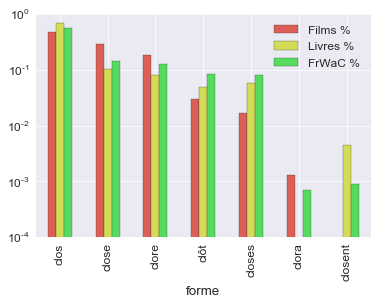

In [594]:
ax=freqClore[selCols].plot(kind="bar")
ax.set(yscale="log")
plt.savefig(repHDR+u'Lex3-FrequencesClore.png', dpi=300, bbox_inches="tight")